<a href="https://colab.research.google.com/github/chosunghyun18/kaggle/blob/master/titanic_tutorial_for_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# test colab
print("Hello worlrd")

Hello worlrd


In [ ]:
# header
#데이터 처리
import numpy as np
import pandas as pd

#시각화
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns 
plt.style.use('seaborn-whitegrid')
import missingno

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
#서포트 백터 머신;/
from xgboost import XGBClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

import sys
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:
test = pd.read_csv('/content/drive/My Drive/Titanic_data/test.csv')
train = pd.read_csv('/content/drive/My Drive/Titanic_data/train.csv')

In [ ]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape #  column : 891

(891, 12)

In [ ]:
#ready for merges file 
ntrain= train.shape[0]   #train.shape[0] = 891, train.shape[1] =  12
ntest= test.shape[0]     #test.shape[0] = 418, test.shape[1] = 11
y_train = train['Survived'].values
passId = test['PassengerId']


data = pd.concat((train,test))

print("data size is :{}".format(data.shape))

data size is :(1309, 12)


In [ ]:
ntrain

891

In [ ]:
ntest

418

In [ ]:
passId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

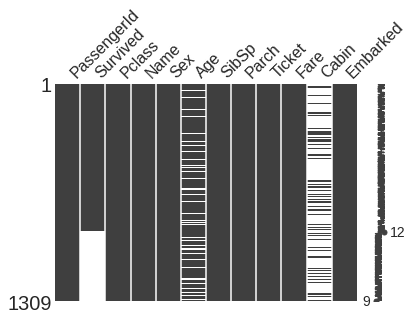

In [ ]:
missingno.matrix(data,figsize=(6,4))

In [ ]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
data.isna().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

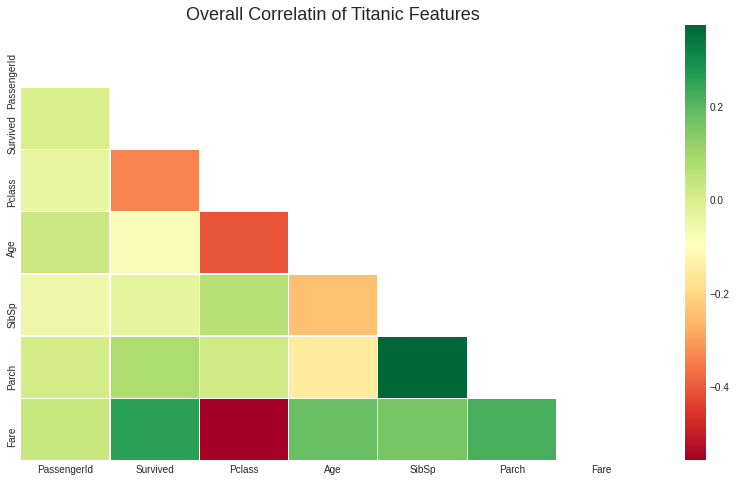

In [ ]:
#co-relation matrix
corr= data.corr() 
mask=np.zeros_like(corr, dtype=np.bool)   # return an arrary of zeros with the same shape and type

mask[np.triu_indices_from(mask)]=True      # Return the indices for the upper-triangle of an (n, m) array. 

plt.figure(figsize=(14,8))
plt.title('Overall Correlatin of Titanic Features', fontsize=18)

#집계한 값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화하는 히트맵(Heatmap)        
sns.heatmap(corr, mask=mask,annot=False ,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})


plt.show()

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0    549
1    342
Name: Survived, dtype: int64


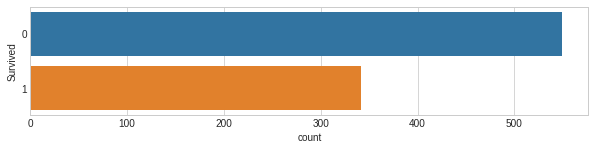

In [ ]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived',data = train)

#print(train.Survived.value_conts) 만 써도 그래프는 나옴 but d

print(train.Survived.value_counts())

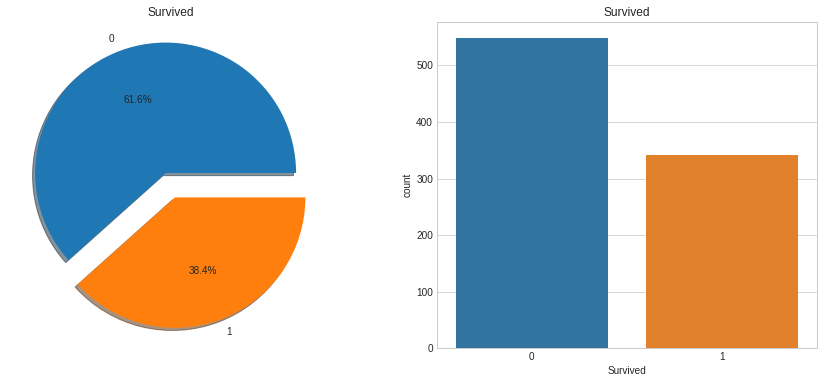

In [44]:
#pie graph
def piecount(col):
    f, ax = plt.subplots(1,2,figsize=(15,6)) #horizantl 15 width 6
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())],autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title(col) 
    ax[0].set_ylabel('')
    sns.countplot(col,data=train,ax=ax[1])
    ax[1].set_title(col)
    plt.show()

piecount('Survived')

In [47]:
 #pclass analysis
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [48]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


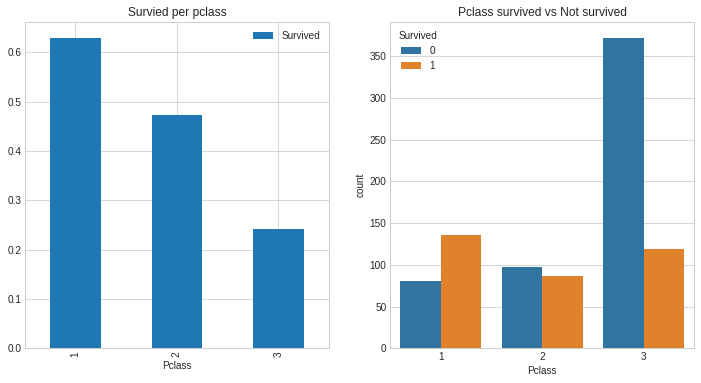

In [56]:
f , ax = plt.subplots(1,2,figsize=(12,6))

ax[0].set_title('Survied per pclass')
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])

ax[1].set_title('Pclass survived vs Not survived')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])

plt.show()

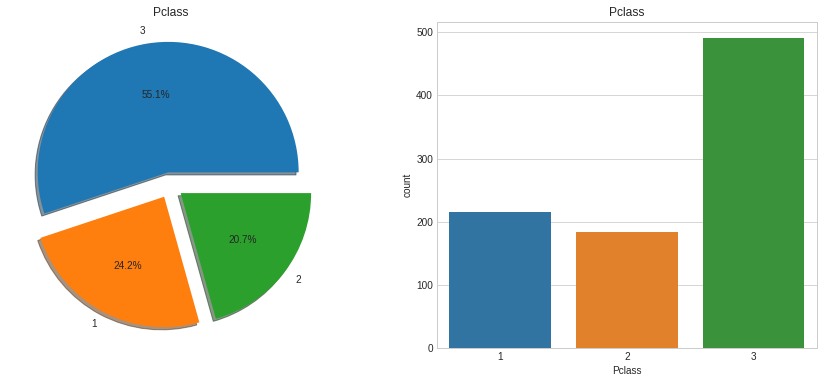

In [57]:
piecount('Pclass')

In [58]:
#NAME analysis
data.Name.value_counts()

Kelly, Mr. James                                       2
Connolly, Miss. Kate                                   2
Eitemiller, Mr. George Floyd                           1
Ayoub, Miss. Banoura                                   1
Lindell, Mrs. Edvard Bengtsson (Elin Gerda Persson)    1
                                                      ..
Cacic, Mr. Jego Grga                                   1
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)        1
LeRoy, Miss. Bertha                                    1
Sage, Miss. Stella Anna                                1
Sage, Mr. George John Jr                               1
Name: Name, Length: 1307, dtype: int64

In [ ]:
#copy data
temp = data.copy()
temp['Initial'] = 0 # make Initial ncate